In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# read in precision and recall data

In [2]:
precision_recall_data = ['precision_recalls/mordred_ML_precision_recalls.csv']
model_names = ['Mordred ML']
precision_recall_data += ['precision_recalls/qm9_precision_recall_roc_smiles_1.csv']
model_names += [r'$E_{min}$']
precision_recall_data += ['precision_recalls/sa_score_precision_recall_roc_smiles_1.csv']
model_names += ['SA Score']
precision_recall_data += ['precision_recalls/sc_score_precision_recall_roc_smiles_1.csv']
model_names += ['SC Score']
precision_recall_data += ['precision_recalls/syba_score_precision_recall_roc_smiles_1.csv']
model_names += ['SYBA Score']
precision_recall_data += ['precision_recalls/ra_score_precision_recall_roc_smiles_1.csv']
model_names += ['RA Score']

# plot precision vs recall on one plot for validation data

(0.0, 1.0)

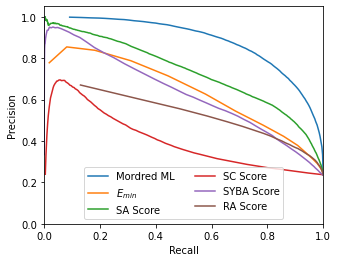

In [3]:
plot = plt.figure(figsize=(5,4))
# plot = plt.figure()

for i in range(len(precision_recall_data)):
    model_name = model_names[i]
    data = precision_recall_data[i]
    df = pd.read_csv(data)
    p = df['Precision']
    r = df['Recall']    
    plt.plot(r,p,label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(ncol=2,loc='lower center')
plt.ylim([0,1.05])
plt.xlim([0,1])

# plot ROC on one plot for validation data

([<matplotlib.lines.Line2D object at 0x7f9fe4a83990>, <matplotlib.lines.Line2D object at 0x7f9fe5439450>, <matplotlib.lines.Line2D object at 0x7f9fe4a83fd0>, <matplotlib.lines.Line2D object at 0x7f9fe4a83f50>, <matplotlib.lines.Line2D object at 0x7f9fe4a8f850>, <matplotlib.lines.Line2D object at 0x7f9fe4a8f650>], ['Mordred ML (AUC=0.953)', '$E_{min}$ (AUC=0.839)', 'SA Score (AUC=0.89)', 'SC Score (AUC=0.648)', 'SYBA Score (AUC=0.819)', 'RA Score (AUC=0.807)'])


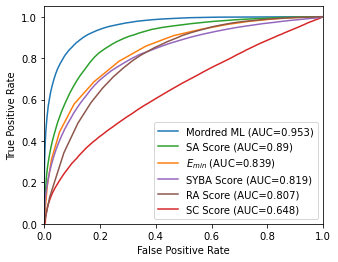

In [4]:
plot = plt.figure(figsize=(5,4))

for i in range(len(precision_recall_data)):
    model_name = model_names[i]
    data = precision_recall_data[i]
    df = pd.read_csv(data)
    
    tp, tn, fp, fn = df['TP'], df['TN'], df['FP'], df['FN']
    
    TPR = tp/(tp+fn)
    FPR = fp/(fp+tn)
    
    AUC = np.abs(np.trapz(TPR,FPR))
    
    plt.plot(FPR,TPR,label=f'{model_name} (AUC={np.round(AUC,3)})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1,4,5,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

print(plt.gca().get_legend_handles_labels())